In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
print("--- Transfer Learning with VGG16 for CIFAR-10 Classification ---")

--- Transfer Learning with VGG16 for CIFAR-10 Classification ---


In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [ ]:
num_classes = 10
train_labels_one_hot = to_categorical(train_labels, num_classes)
test_labels_one_hot = to_categorical(test_labels, num_classes)
print(f" Training images shape after resizing: {train_images.shape}")
print(f" Testing images shape after resizing: {test_images.shape}")

 Training images shape after resizing: (50000, 32, 32, 3)
 Testing images shape after resizing: (10000, 32, 32, 3)


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in vgg16_base.layers:
  layer.trainable = False

In [ ]:
model = Sequential()
model.add(vgg16_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
epochs = 3
history = model.fit(train_images, train_labels_one_hot,
                    epochs = epochs,
                    batch_size = 128,
                    validation_data = (test_images, test_labels_one_hot),
                    verbose=1)

Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 738s 2s/step - accuracy: 0.5701 - loss: 1.2261 - val_accuracy: 0.5830 - val_loss: 1.1840
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 719s 2s/step - accuracy: 0.5794 - loss: 1.1959 - val_accuracy: 0.5909 - val_loss: 1.1672
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 741s 2s/step - accuracy: 0.5911 - loss: 1.1630 - val_accuracy: 0.6004 - val_loss: 1.1472


In [ ]:
final_training_accuracy = history.history['accuracy'][-1]
final_test_accurcay = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {final_training_accuracy:4f}")
print(f"Final Test Accuracy: {final_test_accurcay:4f}")

Final Training Accuracy: 0.590620
Final Test Accuracy: 0.600400


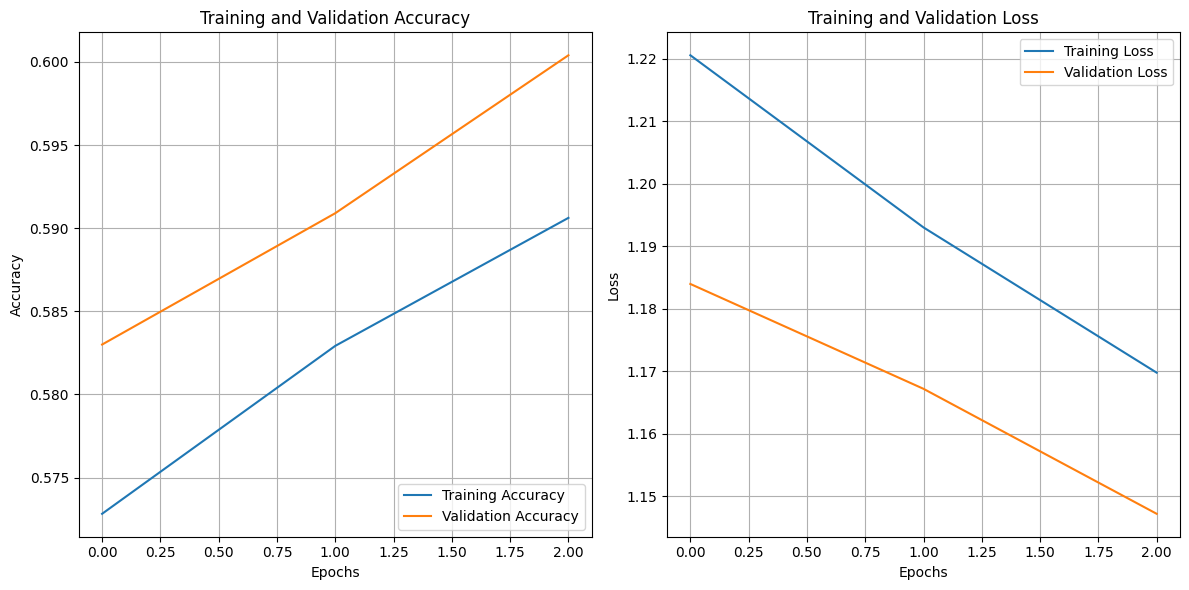

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
sample_index = np.random.randint(0, len(test_images))
sample_images = test_images[sample_index]
true_label_index = test_labels[sample_index][0]
sample_image_batch = np.expand_dims(sample_images, axis=0)
prediction_probabilities = model.predict(sample_image_batch)
predicted_class_index = np.argmax(prediction_probabilities)
predicted_label = class_names[predicted_class_index]
true_label = class_names[true_label_index]
print(f"Predicted label: {predicted_label}")
print(f"True label: {true_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted label: deer
True label: deer


 Actual label: 'deer'
------------------------------------------------------------


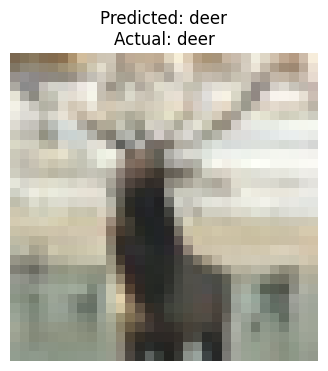

In [ ]:
print(f" Actual label: '{true_label}'")
print("-"*60)

plt.figure(figsize=(4,4))
plt.imshow(sample_images)
plt.title(f"Predicted: {predicted_label}\nActual: {true_label}")
plt.axis('off')
plt.show()